In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 10]

In [ ]:
base_dir = '/content/gdrive/My Drive/Covid19'

In [ ]:
df_byAge = pd.read_csv(base_dir + '/Data/Deaths_by_Age.csv')
df_bySex = pd.read_csv(base_dir + '/Data/Deaths_by_Sex.csv')

## Thông tin chi tiết cho các cột

* **patients**: Tổng số người dương tính
* **with_underlying_health_conditions**: số người được xác nhận có bệnh lý nền
* **without_underlying_health_conditions**: số người được xác nhận không có bệnh lý nền \
(*with_underlying_health_conditions* + *without_underlying_health_conditions* <= *patients* bới có những bệnh nhân không có thông tin kiểm chứng bệnh án trong quá khứ)
* **reported_deaths**: số người đã chết được ghi nhận từ các ca dương tính
* **deaths_with_underlying_health_conditions**: số người chết có bệnh lý nền
* **deaths_without_underlying_health_conditions**: số người chết không có bệnh lý nền \
(*deaths_with_underlying_health_conditions* + *deaths_without_underlying_health_conditions* <= *reported_deaths*)

In [ ]:
df_byAge

,age,patients,with_underlying_health_conditions,without_underlying_health_conditions,reported_deaths,deaths_with_underlying_health_conditions,deaths_without_underlying_health_conditions
0,<=9,20458,619,2277,13,4,2
1,10-19,49245,2076,5047,33,16,4
2,20-29,182469,8906,18530,273,122,24
3,30-39,214849,14854,18629,852,411,21
4,40-49,219139,24161,16411,2083,1077,58
5,50-59,235774,40297,14420,5639,3158,131
6,60-69,179007,42206,7919,11947,7050,187
7,70-79,105252,31601,2799,17510,10008,286
8,>=80,114295,34159,2409,32766,16966,718


In [ ]:
df_bySex

,sex,patients,with_underlying_health_conditions,without_underlying_health_conditions,reported_deaths,deaths_with_underlying_health_conditions,deaths_without_underlying_health_conditions
0,male,646358,96839,42048,38773,21667,724
1,female,674130,102040,46393,32343,17145,707


### Ta tạo thêm 2 cột:
* **unknown_uhc**: số bệnh nhân không rõ tình trạng bệnh lý nền
* **deaths_unknown_udc**: số người chết không rõ tình trạng bệnh lý nền \
(**uhc** - underlying_health_conditions) \
Từ đây ta có \
 *with_uhc + without_uhc + unknown_uhc = patients* \
 *deaths_with_uhc + deaths_without_uhc + deaths_unknown_uhc = reported_deaths*

In [ ]:
# change to short name of columns
df_byAge = df_byAge.rename(columns={'with_underlying_health_conditions': 'with_uhc',
                         'without_underlying_health_conditions': 'without_uhc',
                         'deaths_with_underlying_health_conditions': 'deaths_with_uhc',
                         'deaths_without_underlying_health_conditions': 'deaths_without_uhc'})

df_bySex = df_bySex.rename(columns={'with_underlying_health_conditions': 'with_uhc',
                         'without_underlying_health_conditions': 'without_uhc',
                         'deaths_with_underlying_health_conditions': 'deaths_with_uhc',
                         'deaths_without_underlying_health_conditions': 'deaths_without_uhc'})

In [ ]:
# create 2 more columns
df_byAge['unknown_uhc'] = df_byAge['patients'] - df_byAge['with_uhc'] -df_byAge['without_uhc']
df_byAge['deaths_unknown_uhc'] = df_byAge['reported_deaths'] - df_byAge['deaths_with_uhc'] -df_byAge['deaths_without_uhc']

df_bySex['unknown_uhc'] = df_bySex['patients'] - df_bySex['with_uhc'] -df_bySex['without_uhc']
df_bySex['deaths_unknown_uhc'] = df_bySex['reported_deaths'] - df_bySex['deaths_with_uhc'] -df_bySex['deaths_without_uhc']

In [ ]:
df_byAge

,age,patients,with_uhc,without_uhc,reported_deaths,deaths_with_uhc,deaths_without_uhc,unknown_uhc,deaths_unknown_uhc
0,<=9,20458,619,2277,13,4,2,17562,7
1,10-19,49245,2076,5047,33,16,4,42122,13
2,20-29,182469,8906,18530,273,122,24,155033,127
3,30-39,214849,14854,18629,852,411,21,181366,420
4,40-49,219139,24161,16411,2083,1077,58,178567,948
5,50-59,235774,40297,14420,5639,3158,131,181057,2350
6,60-69,179007,42206,7919,11947,7050,187,128882,4710
7,70-79,105252,31601,2799,17510,10008,286,70852,7216
8,>=80,114295,34159,2409,32766,16966,718,77727,15082


In [ ]:
df_bySex

,sex,patients,with_uhc,without_uhc,reported_deaths,deaths_with_uhc,deaths_without_uhc,unknown_uhc,deaths_unknown_uhc
0,male,646358,96839,42048,38773,21667,724,507471,16382
1,female,674130,102040,46393,32343,17145,707,525697,14491


### Tổng số ca cho từng cột

In [ ]:
summary = dict()
for col in df_byAge.columns[1:]:
  summary[col] = df_byAge[col].sum()

print(f"Trong tổng số  {summary['patients']} ca dương tính covid-19 tại USA tính từ 22 tháng 01 - 30 tháng 05 năm 2020, có:")
print(f"- số bệnh nhân được xác nhận có bệnh lý nền: {summary['with_uhc']}")
print(f"- số bệnh nhân được xác nhận không có bệnh lý nền: {summary['without_uhc']}")
print(f"- số bệnh nhân không rõ tình trạng bệnh lý nền: {summary['unknown_uhc']}")
print(f"- tổng số người đã chết được ghi nhận: {summary['reported_deaths']}")
print(f"- số người chết có bệnh lý nền: {summary['deaths_with_uhc']}")
print(f"- số người chết không có bệnh lý nền: {summary['deaths_without_uhc']}")
print(f"- số người chết không rõ tình trạng bệnh lý nền: {summary['deaths_unknown_uhc']}")


Trong tổng số  1320488 ca dương tính covid-19 tại USA tính từ 22 tháng 01 - 30 tháng 05 năm 2020, có:
- số bệnh nhân được xác nhận có bệnh lý nền: 198879
- số bệnh nhân được xác nhận không có bệnh lý nền: 88441
- số bệnh nhân không rõ tình trạng bệnh lý nền: 1033168
- tổng số người đã chết được ghi nhận: 71116
- số người chết có bệnh lý nền: 38812
- số người chết không có bệnh lý nền: 1431
- số người chết không rõ tình trạng bệnh lý nền: 30873


Gọi 
* $C$ là biến cố bệnh nhân chết
* $T_i$ là biến cố bệnh nhân có độ tuổi tại hàng i (Vd: $T_0$ là độ tuổi '<=9')
* $B_i$ là biến cố bệnh nhân có tình trạng bệnh lý nền thế nào (có bệnh, không bệnh, không xác định).

Khi đó, xác suất tử vong của người có tuổi $T_i$ và tình trạng $B_i$ là: \
$P(C|T_iB_i) = \frac{P(CT_iB_i)}{P(T_iB_i)} = \frac{cột ~ deaths...}{cột ~ with...}$


In [133]:
def draw_bar(df, group):
  labels = df[group]
  col1, col2, col3 = [], [], []
  res = []
  for i, row in df.iterrows():
    x = round(row['deaths_with_uhc'] / row['with_uhc'] * 100, 2)
    y = round(row['deaths_without_uhc'] / row['without_uhc'] * 100, 2)
    z = round(row['deaths_unknown_uhc'] / row['unknown_uhc'] * 100, 2)
    col1.append(x)
    col2.append(y)
    col3.append(z)
    res.append([x, row[group] + " + with_uhc"])
    res.append([y, row[group] + " + without_uhc"])
    res.append([z, row[group] + " + unknown_uhc"])

  

  x = np.arange(len(labels))  # the label locations
  width = 0.3  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width, col1, width, label='With UHC')
  rects2 = ax.bar(x, col2, width, label='Without UHC')
  rects3 = ax.bar(x + width, col3, width, label='Unknown UHC')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('death rate (%)')
  ax.set_xlabel(group + ' group')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)

  fig.tight_layout()

  plt.show()

  return sorted(res)

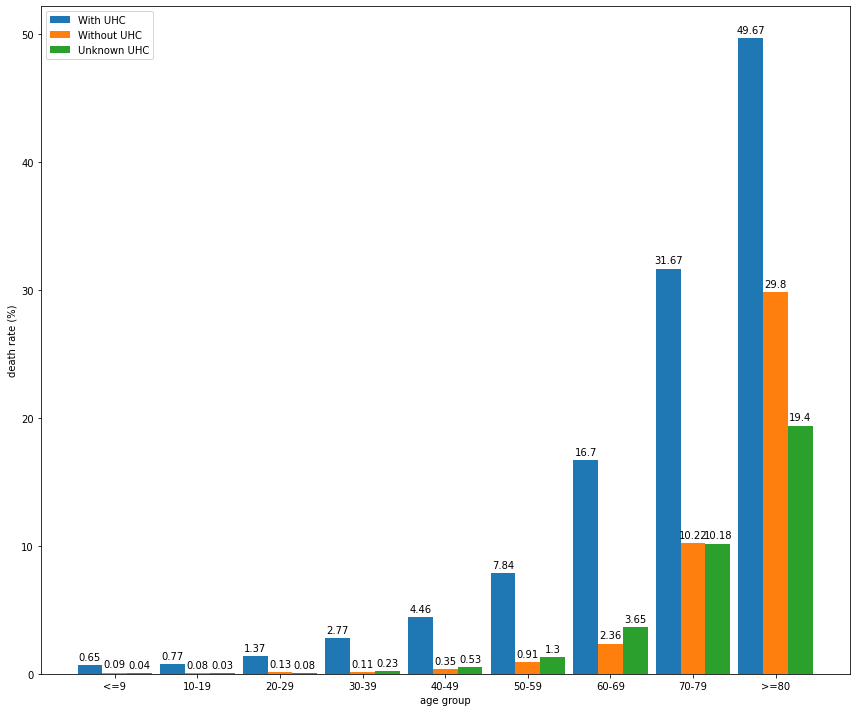

In [134]:
res_age = draw_bar(df_byAge, 'age')

In [135]:
res_age

[[0.03, '10-19 + unknown_uhc'],
 [0.04, '<=9 + unknown_uhc'],
 [0.08, '10-19 + without_uhc'],
 [0.08, '20-29 + unknown_uhc'],
 [0.09, '<=9 + without_uhc'],
 [0.11, '30-39 + without_uhc'],
 [0.13, '20-29 + without_uhc'],
 [0.23, '30-39 + unknown_uhc'],
 [0.35, '40-49 + without_uhc'],
 [0.53, '40-49 + unknown_uhc'],
 [0.65, '<=9 + with_uhc'],
 [0.77, '10-19 + with_uhc'],
 [0.91, '50-59 + without_uhc'],
 [1.3, '50-59 + unknown_uhc'],
 [1.37, '20-29 + with_uhc'],
 [2.36, '60-69 + without_uhc'],
 [2.77, '30-39 + with_uhc'],
 [3.65, '60-69 + unknown_uhc'],
 [4.46, '40-49 + with_uhc'],
 [7.84, '50-59 + with_uhc'],
 [10.18, '70-79 + unknown_uhc'],
 [10.22, '70-79 + without_uhc'],
 [16.7, '60-69 + with_uhc'],
 [19.4, '>=80 + unknown_uhc'],
 [29.8, '>=80 + without_uhc'],
 [31.67, '70-79 + with_uhc'],
 [49.67, '>=80 + with_uhc']]

Gọi $G_i$ là biến cố bệnh nhân có giới tính i (i = male / female)

Khi đó, xác suất tử vong của bệnh nhân có giới tính $G_i$ và tình trạng $B_i$ là: \
$P(C|G_iB_i) = \frac{P(CG_iB_i)}{P(G_iB_i)} = \frac{cột ~ deaths...}{cột ~ with...}$


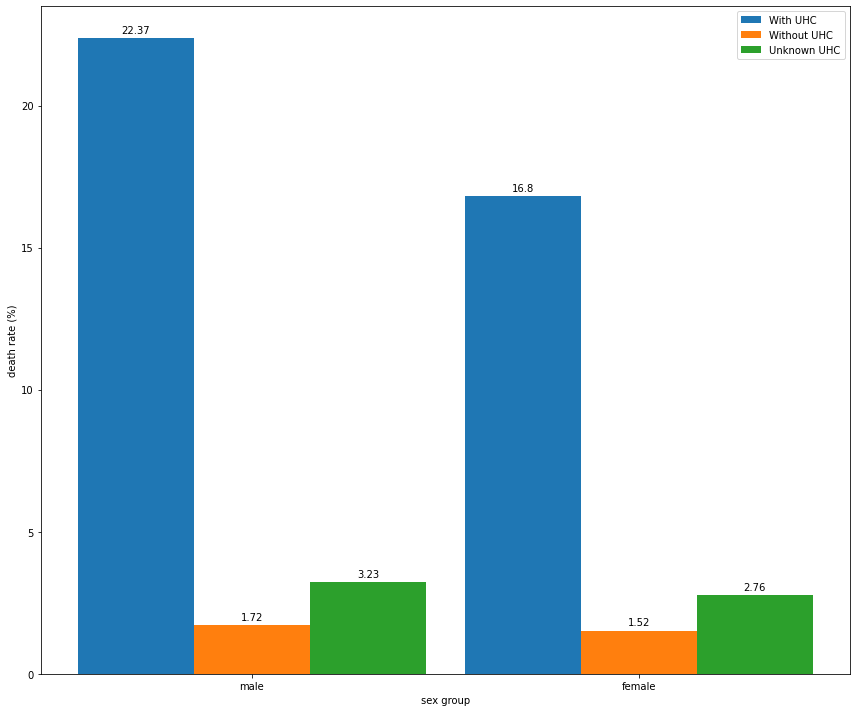

In [136]:
res_sex = draw_bar(df_bySex, 'sex')

In [137]:
res_sex

[[1.52, 'female + without_uhc'],
 [1.72, 'male + without_uhc'],
 [2.76, 'female + unknown_uhc'],
 [3.23, 'male + unknown_uhc'],
 [16.8, 'female + with_uhc'],
 [22.37, 'male + with_uhc']]

## Kết luận
Từ 2 biểu đồ ta có thể suy ra:
* Dựa theo độ tuổi: những bệnh nhận có **độ tuổi >=80** và có **bệnh lý nền** sẽ có nguy cơ tử vong cao nhất
* Dựa theo giới tính: những bệnh nhân có **giới tính Nam** và có **bệnh lý nền** sẽ có nguy cơ tử vong cao nhất